# <font color = 'indianred'>**Import/Install the packages**

In [1]:
# preprocessing warpper for sklearn
!pip install feature_engine -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.5 MB/s eta 0:00:00


In [2]:
import feature_engine

In [3]:
print(feature_engine.__version__)

1.6.1


In [5]:
# Import packages required for data manipulation and cleaning
import pandas as pd  # For DataFrame operations
import numpy as np   # For numerical calculations

# Import packages required for data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For advanced plots and data visualization
import scipy.stats as stats      # For statistical functions
# To display the plots inline in Jupyter Notebook
%matplotlib inline

# Import packages required for model preparation
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets

# Import packages required for dealing with categorical variables
from feature_engine.encoding import OneHotEncoder  # For one-hot encoding categorical variables

# Import packages required for handling missing values
from feature_engine.imputation import MeanMedianImputer  # For imputing missing values with mean or median
from sklearn.impute import SimpleImputer               # General-purpose missing value imputer

# Import packages required for feature scaling
from sklearn.preprocessing import MinMaxScaler        # For Min-Max normalization
from sklearn.preprocessing import StandardScaler      # For Z-score normalization

# Import package for applying transformations to specific DataFrame columns
from sklearn.compose import ColumnTransformer         # For applying transformations to specific columns


# <font color = 'indianred'>**Import the dataset**

In [6]:
df = pd.read_csv("https://drive.google.com/uc?export=view&id=1Kv-W6rWaWuUeDxoNe3_UkZgqewzq0BJB")

# <font color = 'indianred'> **Data Description**
Data is taken from https://www.kaggle.com/shivan118/churn-modeling-dataset (License CC0: Public Domain)

* In this notebook, we will use churn (when a customer ends their relationship with a business) dataset. Companies generally use **churn analytics** to measure the rate at which customers will quit the product, site, or service.
* The revenue of the business could be affected based on the customer churn.
* Businesses need to know which customers are loyal and which are at risk of churning — and understand the factors that affect customer churn.
* In this notebook, we will understand pre-processing steps to clean and prepare data for the model. In the later notebooks, we will understand how to build a model to predict customer churn.


* Here, our data is related to the customers of the telecom industry. We provide a brief description of the variables below:
 1. **RowNumber** - Gives the row number.
 2. **CustomerId** - The ID of the customer.
 1.  **CreditScore** - The credit score attained by  the customer.
 2.  **Geography** - The Country of the customer.
 3.  **Gender** - The gender of the customer.          
 4.   **Age**    - Age of the customer.          
 5.   **Tenure** - How many years the customer is with the company?       
 6.   **Balance** - Balance in the credit card         
 7.   **NumOfProducts** - Number of products bought by the customer by using credit card  
 8.   **HasCrCard** - Whether the customer has the credit card or not.         
 9.   **IsActiveMember** - Does the customer have active membership?     
 10.  **EstimatedSalary** - Estimated salary of the customer.
 11.  **Exited** - churn(whether the customer left the company or not)

# <font color = 'indianred'> **Data Preprocessing**

* It is an intermediary step between EDA (exploratory data analysis) and preparing a model.

* It involves several steps that help convert the raw data into a more suitable form for modeling.

# <font color = 'indianred'>**Why use data preprocessing**

- Many machine learning algorithms impose the requirements on the data, such as data should be numerical, all the attributes should have the same scale, etc.
- There should not be any statistical noise or errors in the data.
- If we find any noise or errors in the data, it should be corrected; otherwise, it will affect our machine learning algorithm.


# <font color = 'indianred'>**Steps taken in data preprocessing**

We can follow the following steps in data preprocessing:-

* Data cleaning - Correcting the errors or data with missing values.

* Data transformation - Scaling or finding the distribution of the data.

* Feature engineering - Adding more variables for the data.

* Dimensionality Reduction - Reducing the shape of the variables from high dimension to the low dimension.


* So, now we know different steps followed in data preprocessing, but the question is **"Do we need to follow all the steps mentioned above"?**
* The answer is a big **no**. Based on the nature of data and algorithm used, it is fine to skip some of the data preprocessing steps"?

* Example:-
  1. **Linear regression models**: These models are sensitive towards the distribution of the data. Hence, we need to make sure the data is Gaussian or apply transformations for turning it into gaussian.
  2. **Tree-based models**: These models can handle categorical variables. We do not need to perform the categorical encoding (transforming the categorical values to numerical type). However, when it comes to other algorithms, categorical encoding is essential.

# <font color = 'indianred'>**Exploratory data analysis**

## <font color = 'indianred'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'indianred'>**Check few rows**

In [7]:
# check the top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1.0,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3.0,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,NaN,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1,1,79084.10,0


###  <font color = 'indianred'>**Check column names**

In [8]:
# Let's check the columns of the data
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### <font color = 'indianred'>**Check data types of columns**

In [9]:
# check the data type for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9995 non-null   float64
 7   Tenure           9995 non-null   float64
 8   Balance          9978 non-null   float64
 9   NumOfProducts    9990 non-null   float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Although the data type of HasCrCard and IsActiveMember is int64, we know that these are categorical variables.
Hence, we will change the datatype to object

In [10]:
# change data type to object
for var in ['HasCrCard' ,'IsActiveMember']:
  df[var]= df[var].astype('object')

In [11]:
# check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9995 non-null   float64
 7   Tenure           9995 non-null   float64
 8   Balance          9978 non-null   float64
 9   NumOfProducts    9990 non-null   float64
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 1.1+ MB


### <font color = 'indianred'>**Check for unnecessary columns**

Columns such as RowNumber, CustomerId, and Surname are unnecessary columns.

We don't need these columns for our analysis as these columns doesn't contain any pattern.

So, we can drop these columns.

In [12]:
# We can drop the columns which are not required for our analysis
# We don't need RowNumber,CustomerId,Surname for the prediction purpose
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis =1, inplace = True )

### <font color = 'indianred'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [13]:
# Identify Columns that Contain a Single value
# we will use nunique() function to get number of unique values for each column
# We can delete the columns which have single values
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'indianred'>**Check summary statistics**

In [ ]:
# We will use describe function and then take the transpose for better visualization
df.describe().T #.T is transpose

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,9995.0,38.922761,10.487842,18.00,32.00,37.000,44.0000,92.00
Tenure,9995.0,5.013007,2.891894,0.00,3.00,5.000,7.0000,10.00
Balance,9978.0,76654.529252,62362.594310,0.00,0.00,97334.690,127677.9475,250898.09
NumOfProducts,9990.0,1.530531,0.581714,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### <font color = 'indianred'>**Check for duplicate rows**

In [14]:
# Identify duplicate rows in the DataFrame
dups = df.duplicated()

# Report whether any duplicate rows exist
print(dups.any())  # Will print True if duplicates exist, otherwise False

# Display all rows that are duplicates
print(df[dups])  # Will list the rows that are duplicates if any exist


False
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


From the given results, we can check that there are no duplicates in our data.

## <font color = 'indianred'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [15]:
# check missing values in data
df.isna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# calculate % of mssing values for each column
df.isna().mean()*100

CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.05
Tenure             0.05
Balance            0.22
NumOfProducts      0.10
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

* We can see that there are four columns with small % of missing values.

## <font color = 'indianred'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [17]:
# Identify categorical variables in the DataFrame
# Check for columns where the data type is 'Object' to determine if they are categorical
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Identify discrete variables in the DataFrame
# Exclude 'Exited' as it's the target variable and only consider columns with fewer than 20 unique values
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 20 and var not in ['Exited']
]

# Identify continuous variables in the DataFrame
# Exclude 'CustomerId' and 'Exited' (the target variable), and already identified discrete variables
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    and var not in discrete and var not in ['CustomerId', 'Exited']
]


In [18]:
# check continous Variables
continuous

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [19]:
# check categorical variables
categorical

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [20]:
# check discrete variables
discrete

['Tenure', 'NumOfProducts']

### <font color = 'indianred'>**Check unique values for variables**

In [21]:
# Calculate the number of unique values for each discrete variable
# Use the nunique() method to get a Series object containing unique value counts
total_unique_values = df[discrete].nunique()

# Iterate through the Series object to print each variable and its number of unique values
# Only consider variables with more than zero unique values
for key, value in total_unique_values.items():
    if value > 0:
        print(f"{key} : {value}")


Tenure : 11
NumOfProducts : 4


In [22]:
# check values for discrete variables
for var in discrete:
    print(var, df[var].unique(), '\n')

Tenure [ 2.  1.  8.  7.  4.  6.  3. 10.  5. nan  9.  0.] 

NumOfProducts [ 1.  3. nan  2.  4.] 



In [23]:
# Check number of unique values for continuous variables
total_unique_values= df[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

CreditScore : 460
Age : 70
Balance : 6382
EstimatedSalary : 9999


In [24]:
# check values for continuous variables
# we will check the first 20 values
for var in continuous:
    print(var, df[var].unique()[0:20], '\n')

CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732] 

Age [42. 41. 39. 43. 44. 50. 29. nan 27. 31. 24. 34. 25. 35. 45. 58. 32. 38.
 46. 36.] 

Balance [     0.    83807.86 159660.8  125510.82 113755.78 115046.74 142051.07
 134603.88 102016.72 143129.41 132602.88       nan 136815.64 141349.43
  59697.17  85311.7  110112.54 134264.04 145260.23  76548.6 ] 

EstimatedSalary [101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8
 119346.88  74940.5   71725.73  80181.12  76390.01  26260.98 190857.79
  65951.65  64327.26   5097.67  14406.41 158684.81  54724.03] 



In [26]:
# Check number of unique values for categorical variables
total_unique_values= df[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Geography : 3
Gender : 2
HasCrCard : 2
IsActiveMember : 2


In [25]:
# check values for categorical variables
for var in categorical:
    print(var, df[var].unique(), '\n')

Geography ['France' 'Spain' 'Germany'] 

Gender ['Female' 'Male'] 

HasCrCard [1 0] 

IsActiveMember [1 0] 



## <font color = 'indianred'>**Check Variable Distributions**

### <font color = 'indianred'>**Categorical Varibles**




#### Frequency distribution of categorical variables and rare categories

* We can define a category as rare if it appears in less than 5% or 1% of the given dataset.
- We first calculate the number of observations in each category.
- We then divide them by the total number of observations to obtain the percentage of observations in each category.
If percentage observation in any category is less than the threshold (e.g., 5%), we can treat these as rare categories.<br>

Rare categories or labels can lead to the following issues:

- Uneven distribution between train and test splits.
- Overfitting in tree-based models.
- Operational issues (new labels in a test that were not in the train data set).


In [ ]:
# Let's check the columns with categorical variables
df[categorical].head()

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1


In [ ]:
cat_freq = # code here
print(cat_freq)

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


Now, let's make a bar plot for displaying the frequency of each category.
* Then, we will also  highlight the 5% mark with a red line as follows :

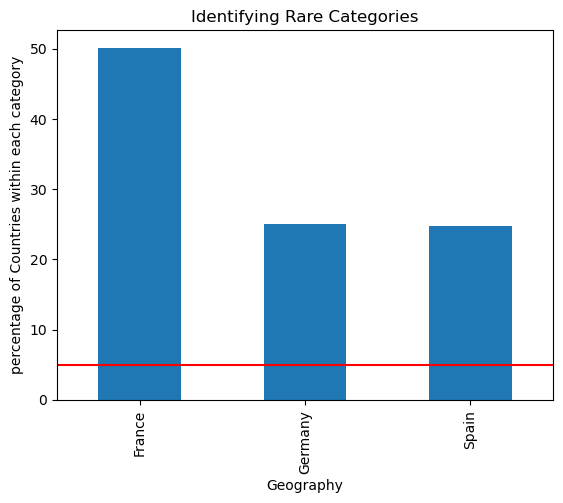

In [ ]:
fig = cat_freq.sort_values(ascending=False).plot.bar() # .plot.bar() will plot bar-plot.
fig.axhline(y=5, color='red') # axhline(y=5, color='red') will plot horizontal red line at y = 5
fig.set_ylabel('percentage of Countries within each category')
fig.set_xlabel('Geography')
fig.set_title('Identifying Rare Categories')
plt.show()

We can observe from the above barplot that we don't have any rare categories in the data. Similarly, we can check the rare categories for other categorical variables.

This code block is focused on creating a bar plot to visualize the frequency distribution of unique values in the 'Geography' column, with a specific emphasis on identifying rare categories. Here's a line-by-line explanation:

- `fig = cat_freq.sort_values(ascending=False).plot.bar()`: This line sorts the values in the `cat_freq` Series in descending order and then creates a bar plot. The variable `fig` stores the plot object, which allows for further customization.

- `fig.axhline(y=5, color='red')`: Adds a horizontal red line to the plot at y = 5. This can act as a reference line to easily identify categories that fall below a certain percentage threshold (in this case, 5%).

- `fig.set_ylabel('percentage of Countries within each category')`: Sets the label for the y-axis to 'percentage of Countries within each category', making it clear what the percentages on the y-axis represent.

- `fig.set_xlabel('Geography')`: Sets the label for the x-axis to 'Geography', indicating that the bars represent different geographic categories.

- `fig.set_title('Identifying Rare Categories')`: Adds the title 'Identifying Rare Categories' to the plot, which describes the purpose of the visualization.

- `plt.show()`: Displays the plot. This is especially useful in script-based environments where the plot won't automatically display.

The code, therefore, not only visualizes the distribution of the 'Geography' column but also adds elements to help the viewer identify categories that are rare or infrequent.

In [ ]:
def check_rare(df, var):
    """
    Plot the frequency of categories for a given variable and highlight categories that occur less than 5% of the time.

    Parameters:
    - df (DataFrame): The input DataFrame containing the variable to be analyzed.
    - var (str): The variable for which the frequency of categories is to be plotted.

    Returns:
    None. A bar plot is displayed.

    Note:
    A horizontal red line is drawn at y=5 to indicate the threshold for rare categories.
    """

    # Calculate the frequency of each category as a percentage of the total for the given variable
    cat_freq = 100 * df[var].value_counts(normalize=True)

    # Plot the frequencies in descending order
    fig = cat_freq.sort_values(ascending=False).plot.bar()

    # Draw a horizontal red line at y=5 as the threshold for rare categories
    fig.axhline(y=5, color='red')

    # Set axis labels and title
    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    # Show the plot
    plt.show()

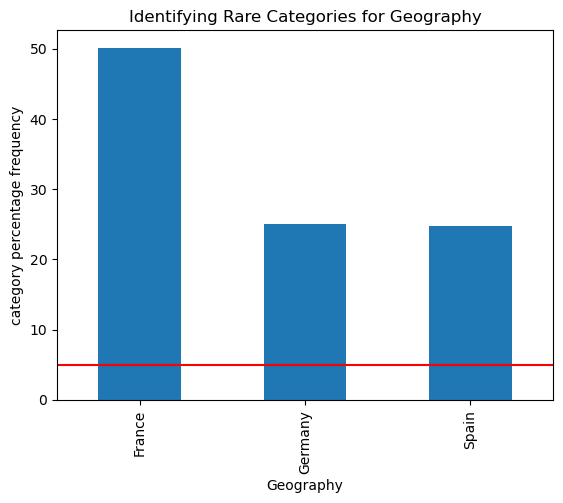

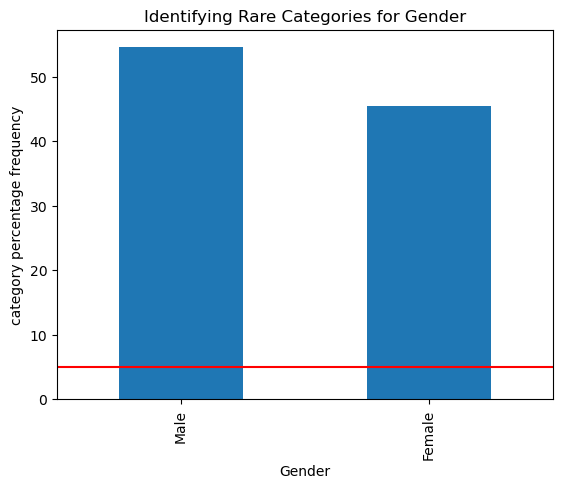

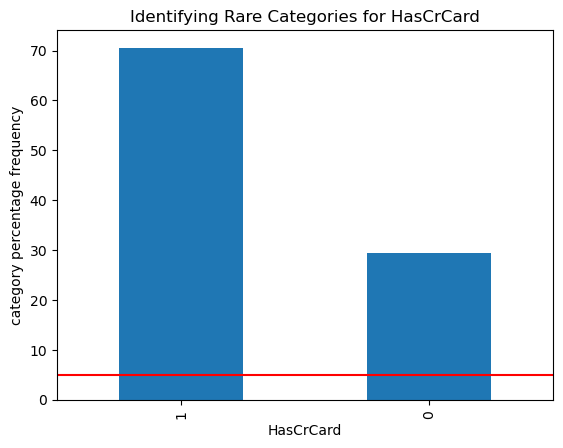

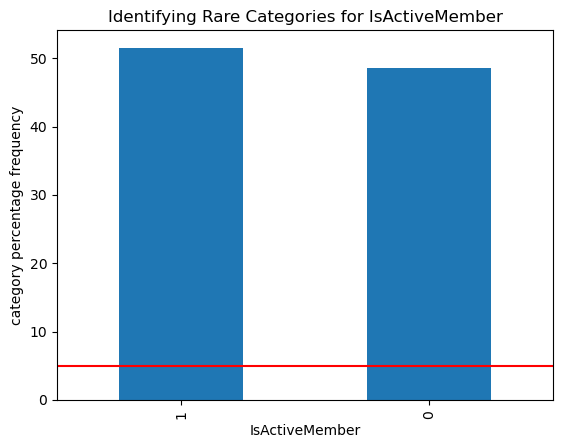

In [ ]:
for var in categorical:
  check_rare(df, var)

#### <font color = 'indianred'> **Check distribution of target variable**

In [ ]:
# Frequency for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company
print(df['Exited'].value_counts())

In [ ]:
# Precantage for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company
print(f"{100 * df['Exited'].value_counts(normalize=True)} ")

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64 


From the above analysis, we can observe that 79.6% of the people did not exit the company or didn't churn out.
20.4% of the customer churned or exited the company. <font color = 'indianred'> We can see that the dataset is **imbalanced** i.e. we have far more observation from one class or label.</font> This can affect the performance of model. We will discuss in later lectures how imbalance effects model performance.

### <font color = 'indianred'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

- <font color = 'indianred'>**Histograms**</font> are used to get the distribution of the discrete or continuous variable in a range. For example, we will be able to see how much data is distributed in a certain range.
- <font color = 'indianred'>**Normal Q-Q plots**</font> help us to visually check if the underlying distribution of a variable is normal or not.<br>
Why is Normality important:
  - Many natural phenomena follow a normal distribution e.g.
  Height, blood pressure, etc.

  - Symmetric:
    - Most of the observations occur around the central
    peak
    - Probabilities for values further away from the center decrease equally in both directions.
    - Extreme values in both tails of the distribution are
    similarly unlikely.

  - Linear Models assume that the independent variables are normally distributed.

  - Other models make no assumption in the distribution of the variables; however, a better spread of the values may improve their performance.

- <font color = 'indianred'>**Box Plots**</font> help us to visually detect if there are outliers in data.

- An <font color = 'indianred'>**outlier**</font> is a data point that is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall, 1980.]

- According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

  Upper boundary = 75th quantile + (IQR * 1.5)

  Lower boundary = 25th quantile - (IQR * 1.5)

  where the inter-quantile range (IQR) is given by:

  IQR = 75th quantile - 25th quantile

- We can use a boxplot to visualize outliers. In the boxplot, the IQR is indicated by the box, the median is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers mark the proximity rule boundaries as described above. Values that fall outside the whiskers are considered outliers.

The below function uses matplotlib, seaborn, and scipy library to plot various plots such as histogram, box-plot, and QQ-plot.

* First, using matplotlib.pyplot, we are creating sub-plots.
* Then seaborn's object sns is used to plot histogram and box-plot.
* Then scipy.stats is used to plot QQ-plot.

We've already imported these libraries, because it is a good practice to import all the required libraries in teh beginnig at one place.
```
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
```


- matplotlib.pyplot has various in-built functions to create various figures/plots.
- matplotlib can be used to plot the scatter plots, bar plots, and so on.
- Apart from this, matplotlib can also be used to create a sub-plots, we can add x or y labels, and legends.
- Seaborn is also an open-source Python library which is built on top of matplotlib library. It is also used to visualize data, it gives more attractive plots than matplotlib. It works well with pandas dataframe.
- Using seaborn you can plot histograms, lineplots, barplots, etc. with better visualization.
- Syntax of seaborn is very simple, you can simply pass column of pandas dataframe in x and y axis.
  - For example, sns.histplot will plot the histogram. A histogram represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.
  - A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be outliers.



In [ ]:
def diagnostic_plots(df, variable):
    """
    Generate diagnostic plots for a given variable.

    Parameters:
    - df (pd.DataFrame): The input data frame containing the variable.
    - variable (str): The name of the variable for which to create the diagnostic plots.

    This function generates three diagnostic plots:
    1. Histogram for distribution visualization.
    2. Boxplot for outlier detection.
    3. Q-Q plot for normality assessment.
    """

    # Create a new figure for plotting
    plt.figure(figsize=(16, 4))

    # First subplot: Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df, x=variable, bins=30)
    plt.title('Histogram')

    # Second subplot: Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # Third subplot: Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')

    # Show all the subplots
    plt.show()

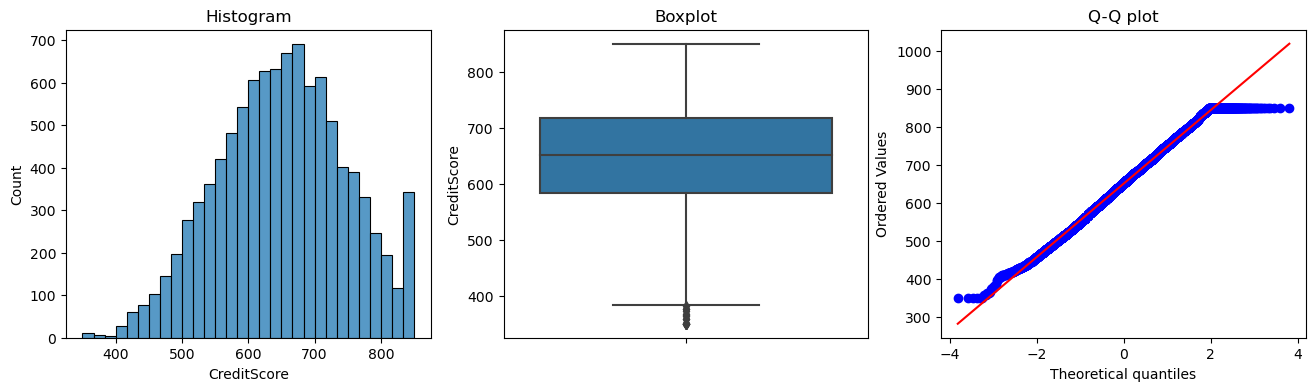

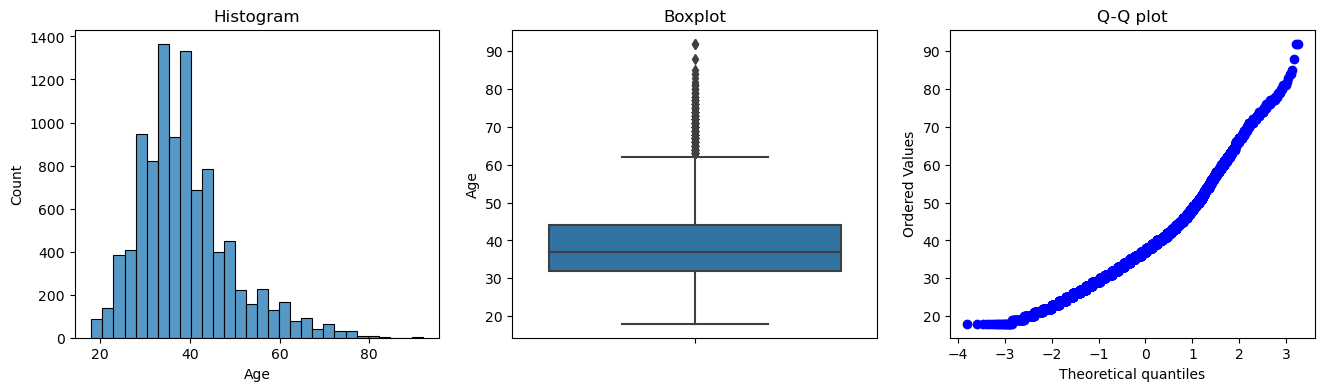

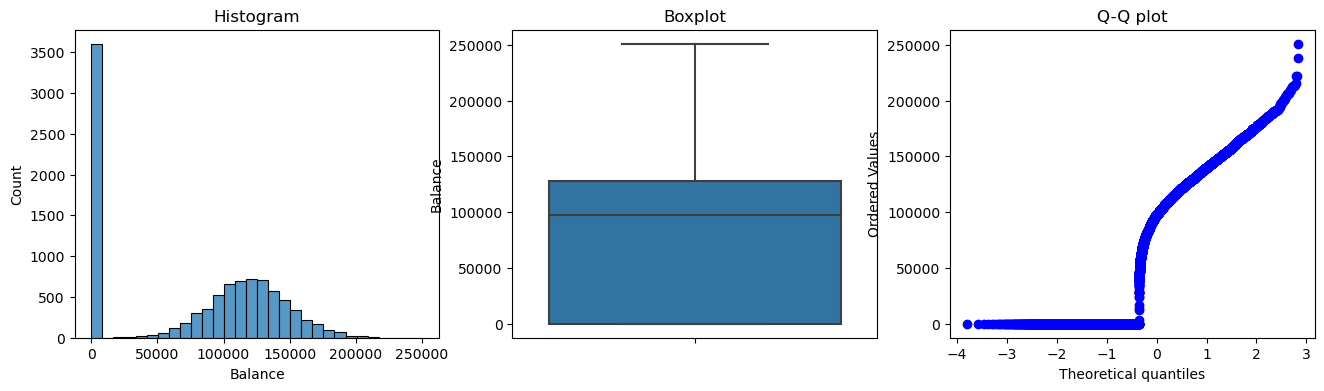

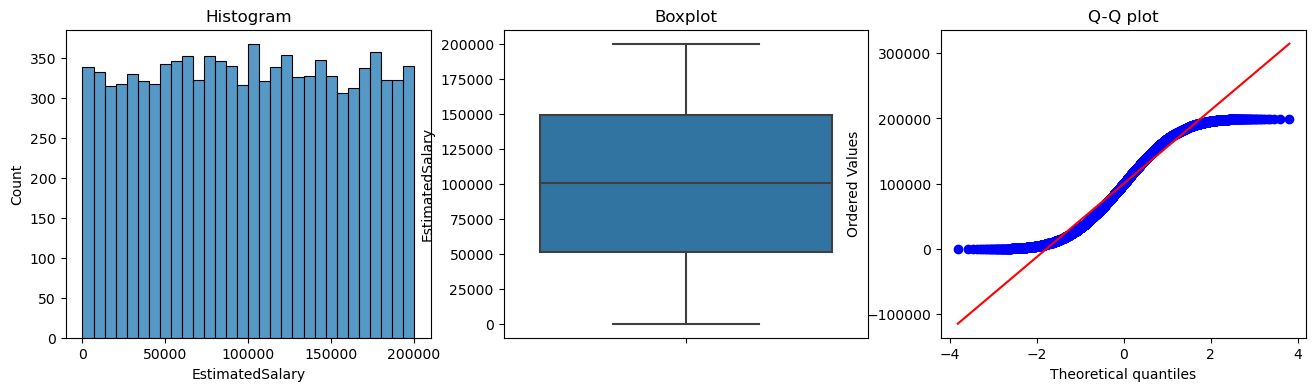

In [ ]:
for var in continuous:
    diagnostic_plots(df, var)

From the above plots, we can see that
* age has skewed distribution and has some outliers as well. We can use transformation to make it normal.
* Estimated salary has uniform distribution.
* Balance has lot of zeros.


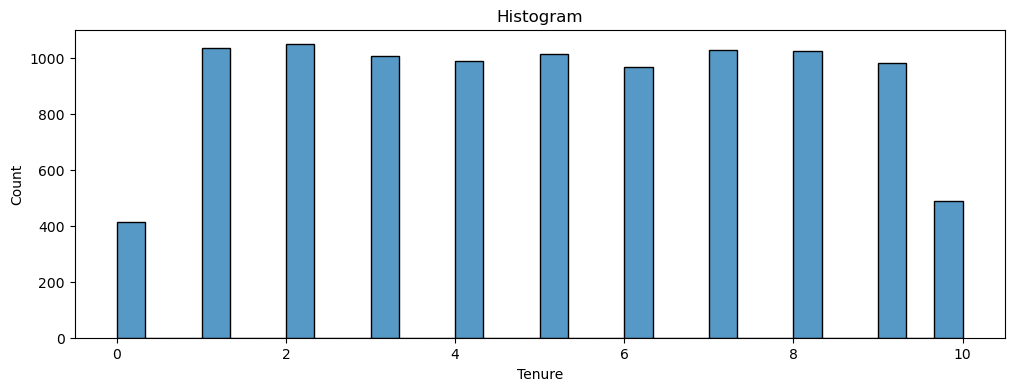

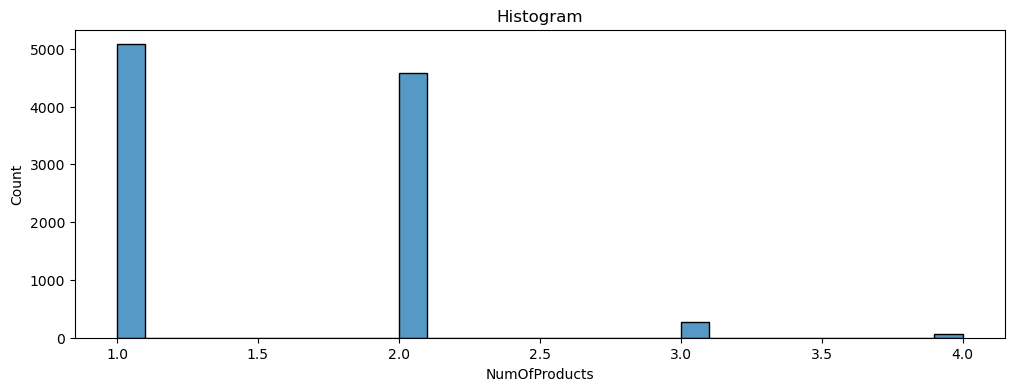

In [ ]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram')

## <font color = 'indianred'>**Visualizing Relationships between variables**

### <font color = 'indianred'>**Correlation Matrix**

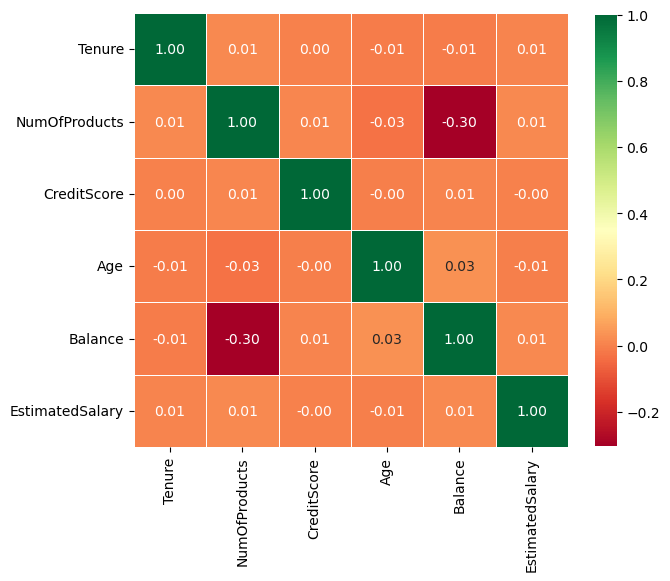

In [ ]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* It's really important to check the correlation between the columns. In general, highly correlated features do not improve the model and lead to overfitting. Furthermore, the effect can vary based on the underlying model:

 * For example, for linear models (e.g., linear regression or logistic regression), high correlations can give solutions that are sensitive to training data and numerically unstable. Due to this, the model might not generalize well to test data and lead to overfitting.

* From the above correlation plot, we observe that the correlation ranges from 0 to 1 for various pairs of attributes.
* Negative Correlation is denoted by **red**.
* None of the correlations are too high.

### <font color = 'indianred'>**Relationship between Target variable and categorical variables**

Now, let's plot a bar-plot of each categorical variable w.r.t. churn rate of each category.

For example, we will get exited churn rate for males and females, i.e., how much percentage of male/female has churned company.

In [ ]:
# We will first grpupby() 'Gender'. We will then take the Exited columns and then take the mean
# The group by column will become row index. We can use reset_index and use the default one.
plot_by_gender = # code here
plot_by_gender

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


Now, let's plot this.

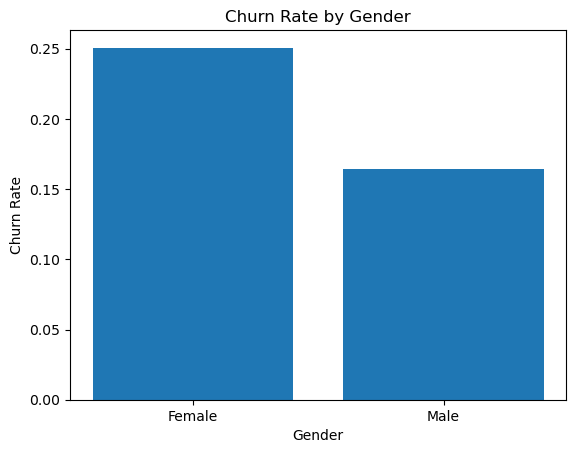

In [ ]:
# Creating the bar plot using matplotlib
plt.bar(plot_by_gender['Gender'].values, plot_by_gender['Exited'].values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title(f'Churn Rate by Gender')
plt.show()

As you can see, we are getting a good visualization of gender w.r.t. total percentage of customer churned.

So now, let's create a function that creates the same bar-plot where a categorical variable can be dynamic like we can pass it as a function argument so that this piece of code can be re-used.

In [ ]:
def plot_target_by_category(df, target, category, ylabel):
    """
    Plot the target variable as aggregated by a categorical variable.

    Parameters:
    - df (pd.DataFrame): The input data frame.
    - target (str): The name of the target variable.
    - category (str): The name of the categorical variable.
    - ylabel (str): The label for the y-axis.

    This function computes and plots the average value of the target variable per category.
    """

    # Compute the mean of the target variable by category
    percent_churn_by_category = df.groupby(category)[target].mean().round(2).reset_index()

    # Create a new figure for plotting
    plt.figure(figsize=(8, 5))

    # Create a bar plot for the target variable by category
    plt.bar(percent_churn_by_category[category].values, percent_churn_by_category[target].values)

    # Set the x and y labels and the title
    plt.xlabel(category)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} by {category}')

    # Show the plot
    plt.show()

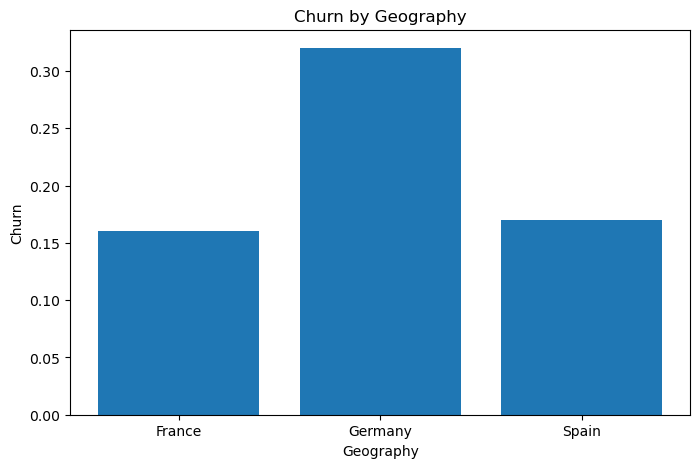

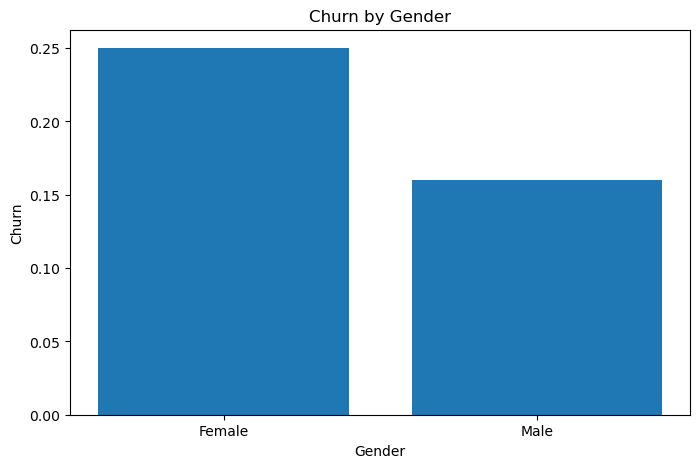

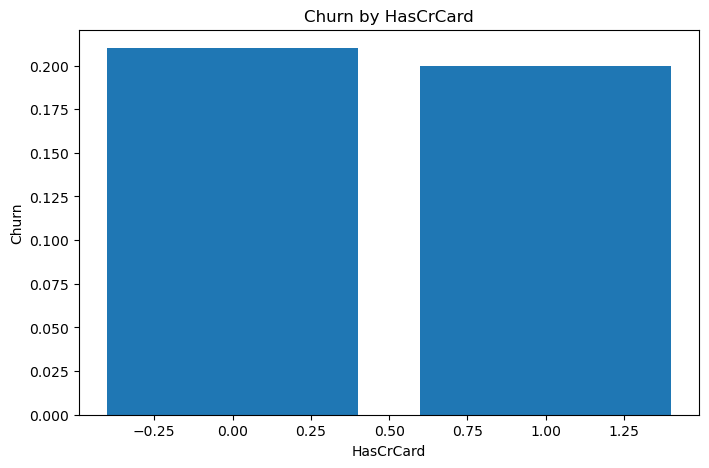

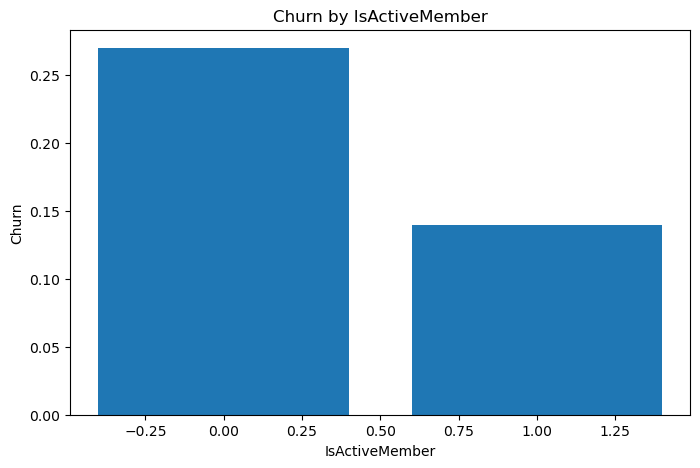

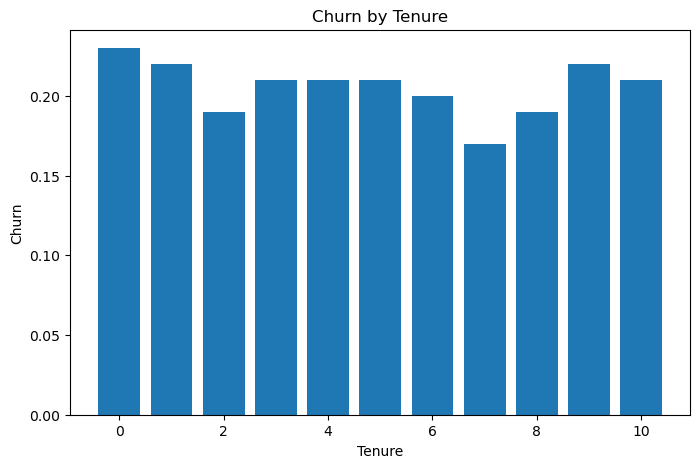

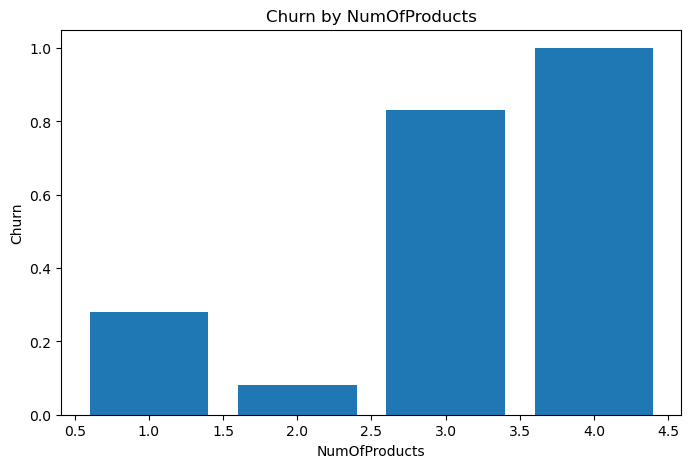

In [ ]:
# Plotting all categorical and discrete features using above function.
for category in categorical + discrete:
  plot_target_by_category(df,'Exited',category,'Churn')

From the above charts, we can conclude that
- Germany has the highest churn rate.
- Females have a greater churn rate than males.
- Non-active members have a greater churn rate than active members.
- Customer's who have bought more number of products are more likely to churn (exit the company)  compared to customer's buying fewer number of products.

## <font color = 'indianred'>**Conclusion from EDA** </font>
From the above exploration of the data, we can come to some conclusions, and they are:-

1. We have checked the number of missing values, and we will use imputation methods to handle these missing values.

2. We have checked the relationship between churn and features.

3. From the distribution plot, we have checked the distribution of each column. 'Age' and 'CreditScore' columns are skewed in nature. We can use transformations to reduce the skewness of the columns.
4. Variables have a different scale. We will use feature scaling to address this.

# <font color = 'indianred'>**Data cleaning** </font>
In data cleaning, we will perform the following operations:-

1. Checking the redundant features
2. Outliers
3. Missing values

    
<img src ="https://drive.google.com/uc?export=view&id=1Cz1zxMp2Rv3GpX2dAqxPgrek-bAQ4go_" width =500 >


Since we have already done the exploratory data analysis.
Now we will be dealing with the variable transformation and missing value imputations as a part of data cleaning.

## <font color = 'indianred'>**Split Dataset into Train/Valid splits**

In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=123)

## <font color = 'indianred'>**Imputing Missing Data**
Some common methods for imputing missing data is as follows :
   * **Complete Case Analysis** (Complete Case Analysis)
>- Complete Case Analysis (CCA) - This method deletes observations (complete rows) where the values in any of the variables are missing.
   * **Mean or median imputation**
>- Replace missing values with the variable mean or
median. We use mean imputation if the variable is normally distributed and median otherwise. This method is used for numerical variables.

   * **Mode or frequent category imputation**
>- Replace missing values with the mode. This method is used for categorical variables.

   * **Arbitrary value imputation**
>- Replace missing values with arbitrary values such as 99999 or -1. This method is used for numerical variables. This is particularly useful when the percentage of missing values is high. The method is also useful for non-linear models.

   * **Adding a Missing category**
>- Replace missing values with the string 'Missing' (new arbitrary category. This method is used for categorical variables. Like arbitrary value imputation, this method is also used when the percentage of missing values is high.

   * **End of Tail imputation**
>- Replace missing values with values from the tail (end) of distribution. For example, for normally distributed variables, we can replace missing values with `mean + 3 * std `. This method is used for numerical variables. This is used when we assume that missing values are likely to be extreme values.


   * **Random Sample imputation**
>- Replace missing values with randomly chosen values from non-missing values of the same variable. This method can be used for both numerical and categorical variables.

   * **Adding a missing value indicator**
>- Add a dummy variable to indicate missing values in observation. This is typically used along with mean/median imputation and mode imputation.

   * **Multivariate imputation by chained equations (MICE)**
>- Missing values are imputed as a function of other independent variables in an iterative process. We can use supervised learning algorithms like linear regression, random forest, etc.

**Summary Table**

 <img src ="https://drive.google.com/uc?export=view&id=1R3DjSPAGI_UupOjW4gbu4kHlWY9w5Ccx" width = 1000 >

#### <font color = 'indianred'>**Columns with missing values**
Let's consider the columns with missing values in separate dataframe.

In [ ]:
# Let's create the list of columns which have null values
null_values = # CODE HERE
null_values

['Age', 'Tenure', 'Balance', 'NumOfProducts']

In [ ]:
# let's create a new dataframe for the missing values
missing_cols = ['Age', 'Tenure', 'Balance', 'NumOfProducts']
X_train[missing_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6697.0,38.955204,10.649253,18.0,32.0,37.000,44.0000,92.00
Tenure,6698.0,5.012541,2.888836,0.0,3.0,5.000,7.0000,10.00
Balance,6684.0,76727.524686,62671.765150,0.0,0.0,97082.645,127871.4425,238387.56
NumOfProducts,6694.0,1.533164,0.584185,1.0,1.0,1.000,2.0000,4.00


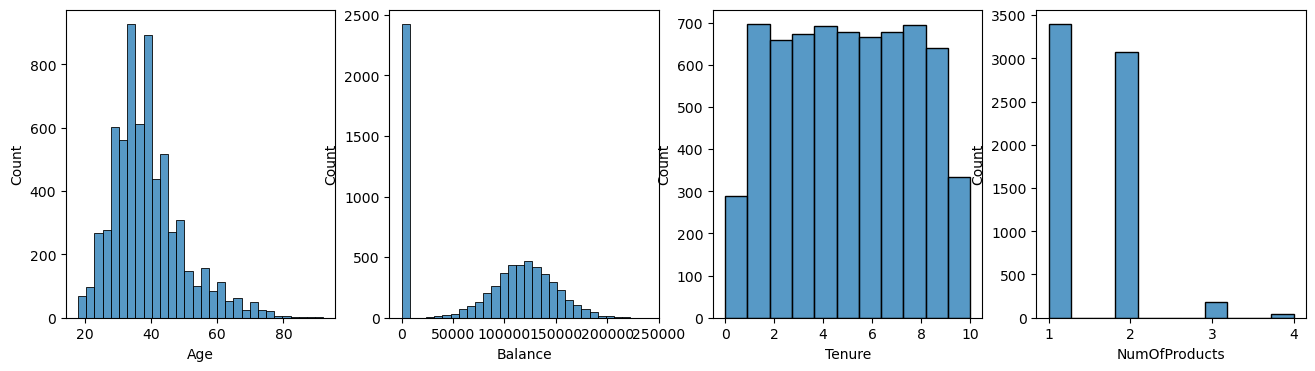

In [ ]:
# let us plot the dstrbution again as this wil help us in deciding the imputtaion method
plt.figure(figsize=(16, 4))

# histogram
# plt.subplot(num rows, num columns, index)
plt.subplot(1, 4, 1)
sns.histplot(X_train['Age'], bins=30)

plt.subplot(1, 4, 2)
sns.histplot(X_train['Balance'], bins=30)

plt.subplot(1, 4, 3)
sns.histplot(X_train['Tenure'], bins=11)

plt.subplot(1, 4, 4)
sns.histplot(X_train['NumOfProducts'], bins=11)

plt.show()

- Age has a skewed distribution; hence we will use median imputation for Age.
- For balance, if we ignore zeros, then it has a normal distribution. One possibility is to first predict zero vs non-zero balance using other independent variables. If the prediction is zero, then impute missing values using zero and if it is non-zero, then impute missing values using mean(considering only non-zero values. For simplicity, we will use median for balance as well.
- Tenure is discrete and can take only 11 unique values. All the values from 3 to 9 seem equally likely. Mean and median are both 5. So we will use median for tenure as well.
- NumOdProducts is a discrete variable and can take only four values. One seems to be the most frequent value. The median is also one. So we can impute missing values using one.
- **In summary, we can use median imputation for all variables**.

#### <font color = 'indianred'>**Median Imputation using Scikit learn**
Median imputation using Simple Imputer and ColumnTransformer

In scikit learn the SimpleImputer helps to impute the missing values directly with mean,median etc.

  **Syntax** :


  ```
  from sklearn.impute import SimpleImputer
  SimpleImputer(strategy = 'mean/median/mode')
```
It can take the argument as mean/median/mode.

We will also need to use ColumnTransformer to specify which columns we need to apply the transformation

  **Syntax** :

  ```
  from sklearn.compose import ColumnTransformer

  ColumnTransformer(transformers)
```
transformers is a list of (name, transformer, columns) tuples.

In [ ]:
# using SimpleImputer to impute the missing values from scikit learn
# Initializing the object using SimpleImputer
# Giving strategy = median
median_imputer = # CODE HERE

preprocessor = # CODE HERE

# In the above command remainder = 'passthrough tells us that
# we will not apply transformation to other variables

# It is important to make sure that median is calculated using training data
# The fit method in sklearn will calculate the median
# hence we use fit on training data only

# CODE HERE

# using transform function to replace the missing values
# transform function will use the median value calculated during fit() to impute msing values
# we will apply transform on both training and validation datset
# this will ensure that we are using median calculated from training data to impute
# missing values for both training and validation dataset
# we should never do .fit() on test/validation datasets
# fit() should be always used on training dataset only
# This is important, since we do not want to use any information from validation/test dataset

X_train_sklearn = # CODE HERE
X_valid_sklearn = # CODE HERE

In [ ]:
# The column transfomer output is a numpy array
# we can check the type of transformed data
print(f'type of X_train before imputation: {type(X_train)}')
print(f'\ntype of X_train after imputation: {type(X_train_sklearn)}')

type of X_train before imputation: <class 'pandas.core.frame.DataFrame'>

type of X_train after imputation: <class 'numpy.ndarray'>


- The other important thing which we have to remember is that the order of the columns in the transformed array follows the order specified in transformers.
- In our case  the order will be ['Age', 'Tenure', 'Balance', 'NumOfProducts'] followed by reminder of columns.
- The order can be different from the order of columns in original dataframe.

In [ ]:
# convert the numpy array back to pandas dataframe
# now we have to be careful about the order of columns

# let us check the original columns
original_columns = list(X_train.columns)
original_columns

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
# let us see order of new columns
remainder = original_columns
for column in missing_cols:
  remainder.remove(column)

remainder

['CreditScore',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
# in the ColumnTransformer , we first passed missing_cols followed by remainder
# so the order of the output will be missing_cols followed by remainder cols
new_columns = missing_cols + remainder
new_columns

['Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'CreditScore',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [ ]:
X_train_sklearn = pd.DataFrame(X_train_sklearn, columns = new_columns)

In [ ]:
X_valid_sklearn = pd.DataFrame(X_valid_sklearn, columns = new_columns)

In [ ]:
X_valid_sklearn.head()

,Age,Tenure,Balance,NumOfProducts,CreditScore,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary
0,34.0,5.0,0.0,2.0,779,Spain,Female,0,1,111676.63
1,26.0,1.0,77780.29,1.0,748,France,Female,0,1,183049.41
2,28.0,10.0,79562.98,1.0,651,France,Male,1,1,74687.37
3,44.0,2.0,117028.6,2.0,663,Germany,Male,0,1,144680.18
4,37.0,8.0,0.0,1.0,516,France,Male,1,0,101834.58


In [ ]:
X_valid.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2656,779,Spain,Female,34.0,5.0,0.00,2.0,0,1,111676.63
445,748,France,Female,26.0,1.0,77780.29,1.0,0,1,183049.41
9505,651,France,Male,28.0,10.0,79562.98,1.0,1,1,74687.37
332,663,Germany,Male,44.0,2.0,117028.60,2.0,0,1,144680.18
4168,516,France,Male,37.0,8.0,0.00,1.0,1,0,101834.58


- **The above example clearly demonstrates that ColumnTransformer has changed the order of the columns**

In [ ]:
# Let's check the null values in our new dataframe

X_train_sklearn.isna().any()

Age                False
Tenure             False
Balance            False
NumOfProducts      False
CreditScore        False
Geography          False
Gender             False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

In [ ]:
X_valid_sklearn.isna().any()

Age                False
Tenure             False
Balance            False
NumOfProducts      False
CreditScore        False
Geography          False
Gender             False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

This confirms that there are no missing values in the data now.

#### <font color = 'indianred'>**Median Imputation using Feature engine**
We will now demonstrate how to impute missing values with median using Feature-engine Library.

**For other imputation methods, refer to the following link: https://feature-engine.readthedocs.io/en/1.1.x/imputation/index.html**

**MeanMedianImputation in Feature engine**

**Syntax**
```
feature_engine.imputation.MeanMedianImputer(imputation_method='median', variables=None)
```
where,
* The MeanMedianImputer() replaces missing data by the mean or median value of the variable.
* It works only with numerical variables.
* We can pass a list of variables to be imputed.

In [ ]:
# object for  MeanMedianImputer()
feature_imputer = # CODE HERE

# first calculates the mean / median values of the variables (fit)
feature_imputer.fit(X_train)

# Then replaces the missing data with the estimated mean / median (transform)
X_train_fe = # CODE HERE
X_valid_fe = # CODE HERE

In [ ]:
# check the type of X_train
print(type(X_train_fe))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# let us check the head()
X_valid_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2656,779,Spain,Female,34.0,5.0,0.00,2.0,0,1,111676.63
445,748,France,Female,26.0,1.0,77780.29,1.0,0,1,183049.41
9505,651,France,Male,28.0,10.0,79562.98,1.0,1,1,74687.37
332,663,Germany,Male,44.0,2.0,117028.60,2.0,0,1,144680.18
4168,516,France,Male,37.0,8.0,0.00,1.0,1,0,101834.58


In [ ]:
# Let's check the null values in our new dataframe

X_train_fe.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

In [ ]:
X_valid_fe.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

**Advantages of Feature-engine over sklearn**

- Output after imputation is a pandas Dataframe and not a numpy array
- It is easier to specify variables for which we want to apply transformation.
- Column order does not change



## <font color = 'indianred'>**Transforming Numerical Variables**
- We can handle skewness by transformation of numerical variables


In [ ]:
transformation_needed = ['Age', 'CreditScore']
transformation_needed

['Age', 'CreditScore']

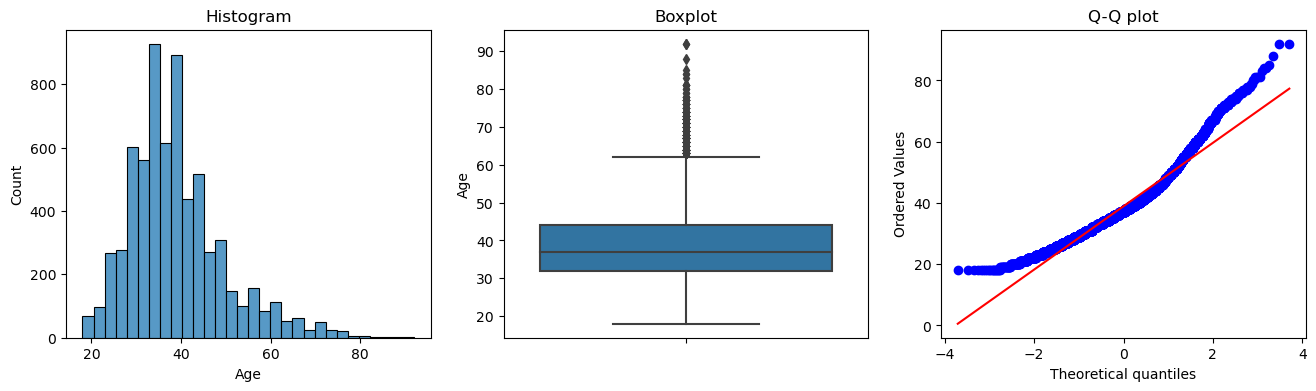

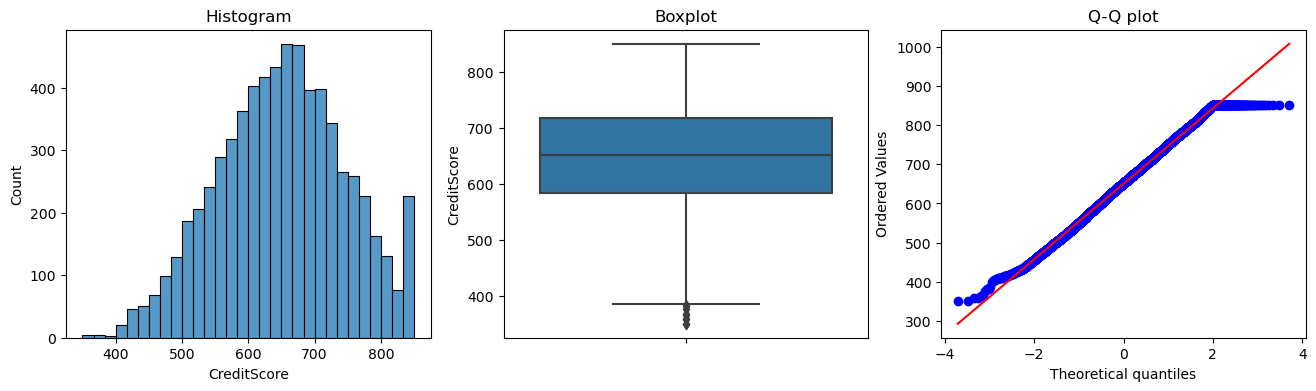

In [ ]:
# figures for X_train
for variable in transformation_needed:
    diagnostic_plots(X_train_fe, variable)

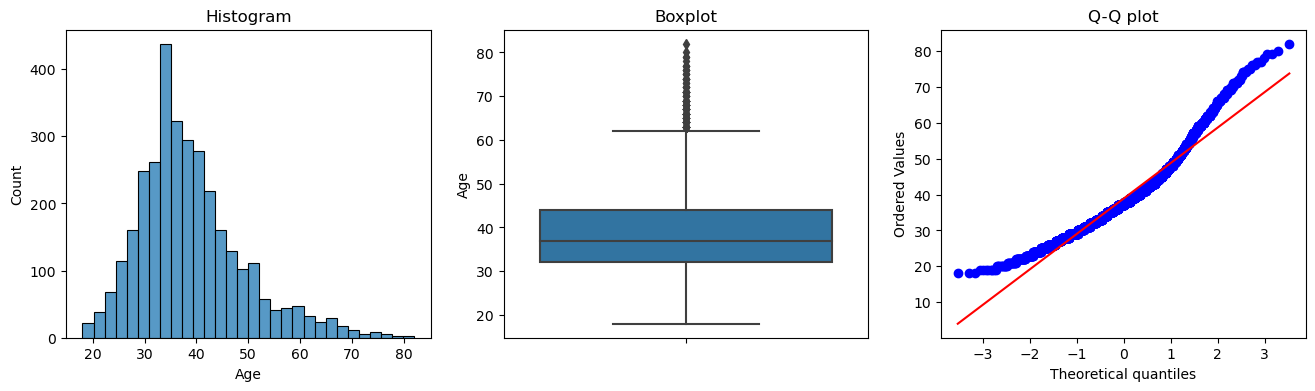

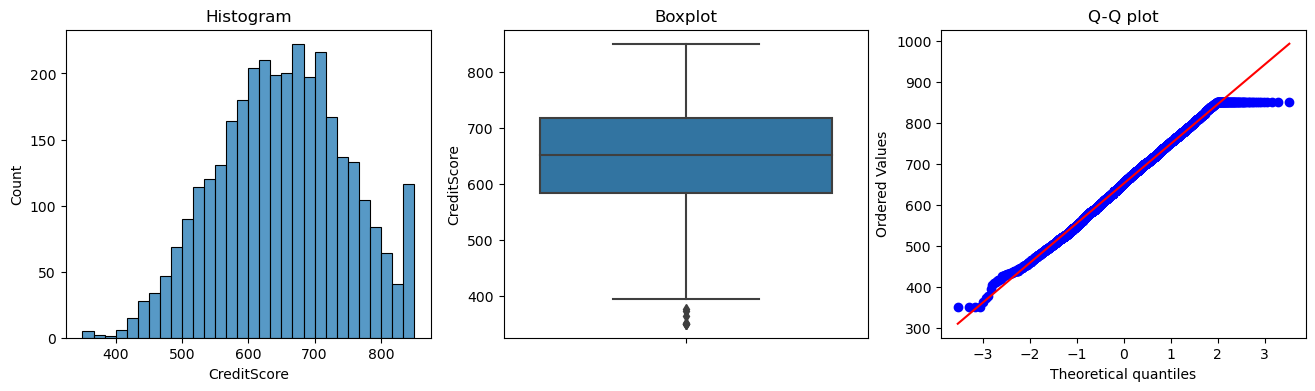

In [ ]:
# figures for X_valid
for variable in transformation_needed:
    diagnostic_plots(X_valid_fe, variable)

<font color = 'indianred'>**Transforming Numerical Variables** <br>

Following transformations are common:
 * Logarithmic Transformation
> The logarithm function is commonly used to transform variables. It only works with non-negative numerical values.
 * Reciprocal Transformation
>The reciprocal function is defined as 1/x. We cannot apply this transformation if the data has zero values.

 * Power Transformations
> Exponential or power functions are mathematical transformations that follow $X_t = X^l$,
where $l$ can be any exponent. $l = 1/2$ will give square root transformation. It is a good practice to try
different values of $l$ to determine the value of $l$, which will give the best transformation. We can check the transformations using Q-Q plots
 * Box-Cox Transformation
> The Box-Cox transformation is defined by

 > <img src ="https://drive.google.com/uc?export=view&id=1c6XhA5OTH8xUjtQ2fdlS1BPuzV9Ay8PB" width = 300>




image source: https://www.stat.umn.edu/arc/yjpower.pdf

 Here again . we choose that value of lambda that provides best approximation of normal distribution. The BoxCoxTransformer() works only with numerical positive variables (>=0, the transformer also works for zero values).
 * Yeo-Johnson Transformation
 > Yeo-Johnson Transformation is defined by
  > <img src = "https://drive.google.com/uc?export=view&id=1WYIb8USiVDXgC7oyDEdfyVC2jNj7ZQ-w" width = 500>

image source: https://www.stat.umn.edu/arc/yjpower.pdf)

 . This transformation works for positive, zero as well as negative values. It is a variation of box-cox that works with negative values as well.



### <font color = 'indianred'>**Yeo-Johnson Transformation using Feature Engine**

We will demonstarte Yeo-Johnson Transformation.

**For the syntax of other transformations refer to the link : https://feature-engine.readthedocs.io/en/1.1.x/transformation/index.html**

In [ ]:
from feature_engine import transformation as vt
yjt = # CODE HERE
# fit the transformer
yjt.fit(X_train_fe)

# transform the data
X_train_fe = yjt.transform(X_train_fe)
X_valid_fe = yjt.transform(X_valid_fe)

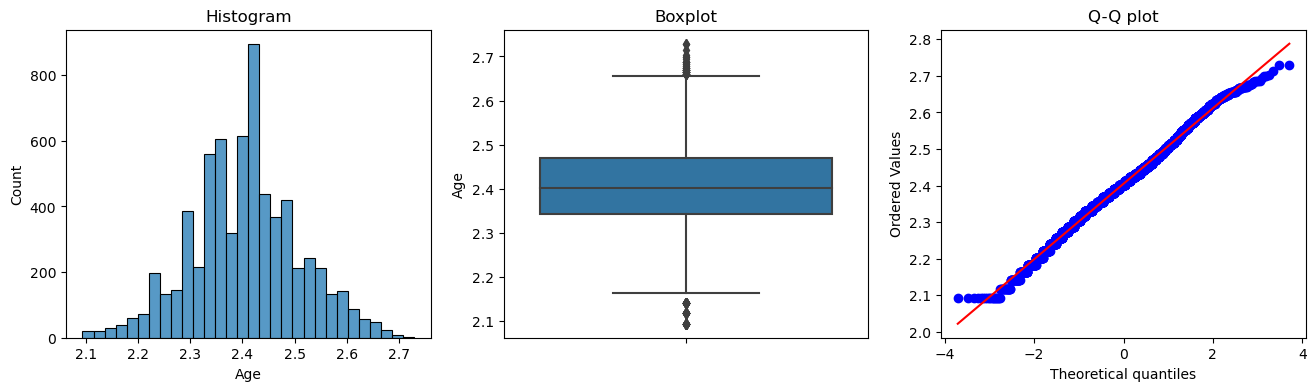

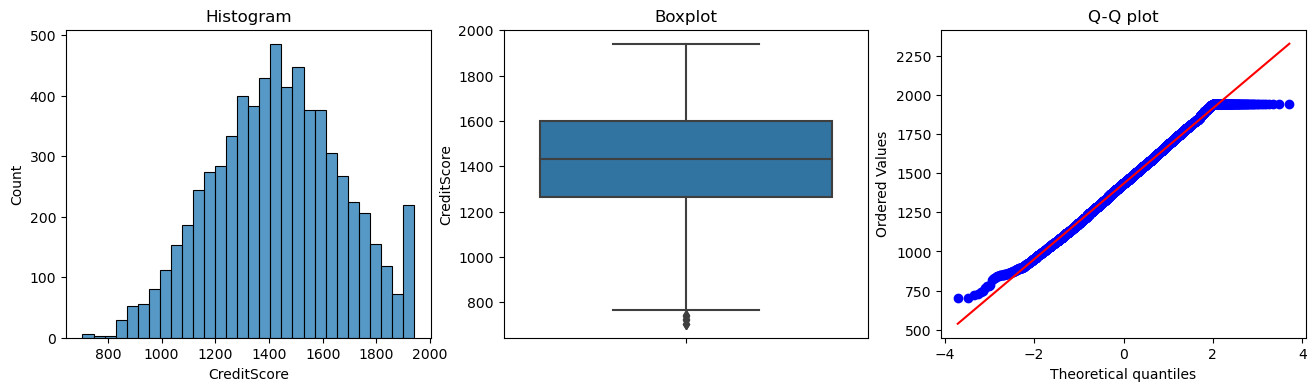

In [ ]:
# figures for X_train
for variable in transformation_needed:
    diagnostic_plots(X_train_fe, variable)

## <font color = 'indianred'>**Encoding Categorical Variables**</font>



<font color = 'indianred'>**One-hot encoding**

 >* In one-hot encoding, we create a binary variable for each category.
* Binary variables are also called dummy variables
* The binary variable has two values = 0 and 1. 1 indicates that category is present in observation, and 0 indicates that category is not present in an observation.
* The following table shows the one-hot encoded representation of colors red, green, and blue:

><table>
<tr>
<th>Color</th>
<th>dummy_Red</th>
<th>dummy_Green</th>
<th>dummy_Blue</th>
</tr>
<tr>
<td>Red</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>Green</td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>Blue</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
</table>

- As shown in the table above, we derived three binary variables for three categories. Red takes the value of 1 when the color is red and 0 otherwise. Similarly, Blue and green take the value of 1 when the color is blue and green, respectively.<br>
- A categorical variable with `n` unique categories can be encoded using `n-1` binary (dummy) variables. In the above example, we have three categories, and so we need only two dummy variables to represent the colors. Let us say we dropped the last dummy variable, dummy_Blue. We can use dummy_Red, dummy_green to represent all three colors.

- dummy_Red =1, dummy_Green = 0 will represent Red Color
- dummy_Red =0, dummy_Green = 1 will represent Green Color
- dummy_Red =0, dummy_Green = 0 will represent Blue Color
<br>

<font color = 'indianred'>**For most algorithms, we will create `n-1` dummies if there are `n` categories except for tree-based algorithms such as decision tree, random forest**, etc. The tree-based algorithms we can create `n` dummies as these models do not consider all the features at the same time. </font>

**Summary Categorical Encoding Methods**
 <img src ="https://drive.google.com/uc?export=view&id=1U1ly_emaQGwxgXvRz0I7QdFpNLFN94E7" width = 1800 >

###<font color = 'indianred'> **One Hot Encoding Feature Engine**
We will now demonstrate One Hot Encoding. **For syntax of other encoding methods refer to the link: https://feature-engine.readthedocs.io/en/1.1.x/encoding/index.html**


* **Syntax** :


```
ohe_enc = OneHotEncoder(variables
    top_categories=None,
    drop_last=True)

```
* By mentioning the drop_last = True will give us k-1 columns from the categorical variables
* i.e if we have 5 different categorical variables we will get 4 different columns(i.e 5-1)
* and if we mention drop_last = False then we will get 5 different columns




In [ ]:
# Let's get a categorical column names
categorical

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

- We will first initialize the object with OneHotEncoder
- Since we want to convert  all the categorical variables we will mention variables = categorical.

In [ ]:
# Importing the OneHotEncoder from the feature_engine
from feature_engine.encoding import OneHotEncoder
ohe = OneHotEncoder(variables=categorical,
      drop_last= True)

In [ ]:
# fit_transform on train
X_train_fe = ohe.fit_transform(X_train_fe)

In [ ]:
# only transform on test/validation
X_valid_fe = ohe.transform(X_valid_fe)

In [ ]:
X_valid_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female,HasCrCard_0,IsActiveMember_0
2656,1756.406169,2.367584,5.0,0.00,2.0,111676.63,0,1,1,1,0
445,1676.882932,2.256071,1.0,77780.29,1.0,183049.41,1,0,1,1,0
9505,1431.141853,2.287492,10.0,79562.98,1.0,74687.37,1,0,0,0,0
332,1461.276897,2.468981,2.0,117028.60,2.0,144680.18,0,0,0,1,0
4168,1097.862930,2.401458,8.0,0.00,1.0,101834.58,1,0,0,0,1


In [ ]:
X_valid.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2656,779,Spain,Female,34.0,5.0,0.00,2.0,0,1,111676.63
445,748,France,Female,26.0,1.0,77780.29,1.0,0,1,183049.41
9505,651,France,Male,28.0,10.0,79562.98,1.0,1,1,74687.37
332,663,Germany,Male,44.0,2.0,117028.60,2.0,0,1,144680.18
4168,516,France,Male,37.0,8.0,0.00,1.0,1,0,101834.58


As we can see above, one hot encoding removes  the original variables and adds dummy variables. Since we specified drop last = True, it creates n-1 dummy variables for n categories.

## <font color = 'indianred'>**Discretization**
- Discretization is the process of mapping continuous variables to discrete variables.   
- Discretization can improve model performance if some continuous variables are highly skewed or have non-standard distributions.
- Some machine learning algorithms (e.g. descion trees) may prefer discrete variables.
- The various methods to perform discretization are provided in table below:

<img src ="https://drive.google.com/uc?export=view&id=10Qnj7ocAOMyxWmo_GXzigngKtat0Senr" width =700 >

- In our dataset Creditscore and Balance variables have non-standard distributions (see plots below).
- Balance has a cluster of zeros and credit score has cluster of higher values.

- For these variables, discretization can sometimes improve model performance.



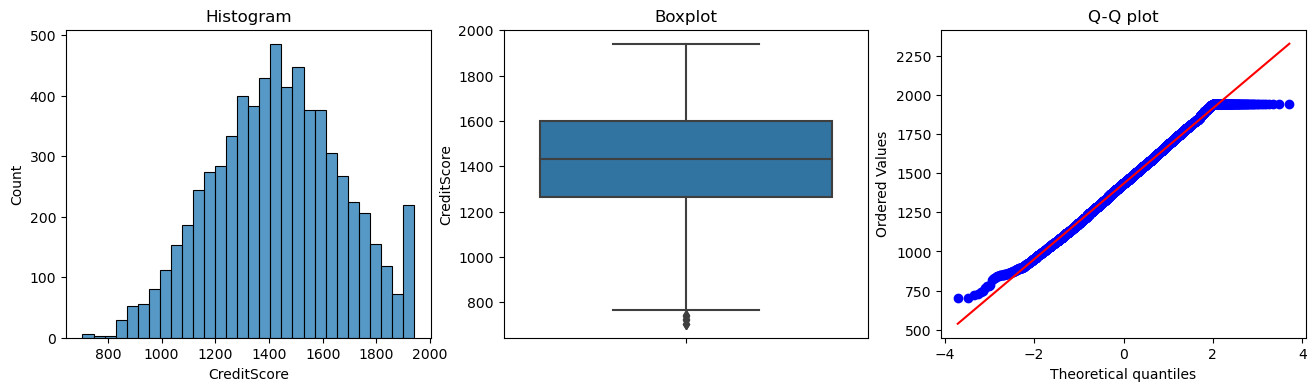

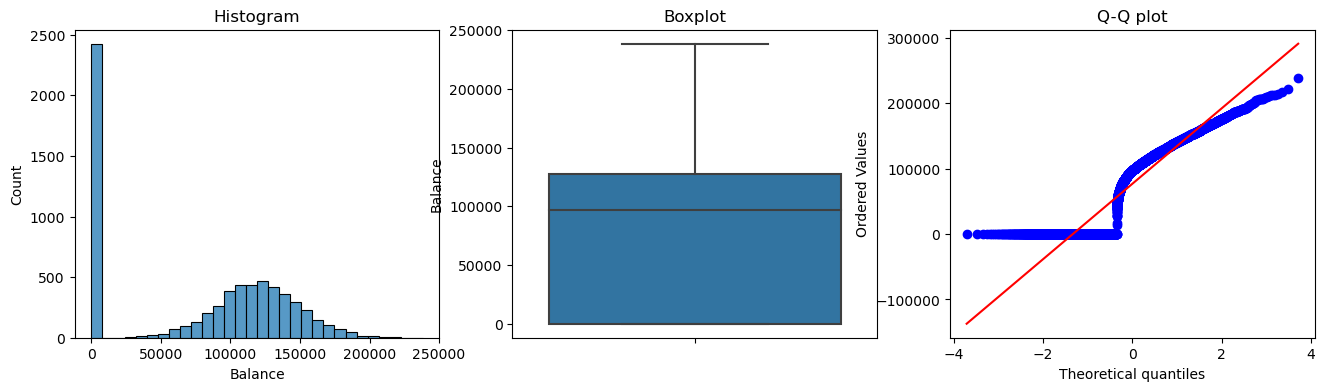

In [ ]:
for variable in ['CreditScore', 'Balance']:
    diagnostic_plots(X_train_fe, variable)

### <font color = 'indianred'>**K-means Discretization using Feature Engine**</font>

We will demonstrate K-means method. <br>**For syntax of other methods of dicretization please refer to the following link: https://feature-engine.readthedocs.io/en/1.1.x/discretisation/index.html**

- Discretization with k-means clustering is not directly available in Feature Engine
- We will first import KBinsDiscretizer from sklearn
- We can then use SklearnTransformerWrapper from the feature engine
- The wrapper allows us to use any transformation from sklearn
- The advantage of using a wrapper is that we can apply the transformation on selected columns directly without using ColumnTransformer.
- Further, as discussed earlier, the order of columns does not change.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.wrappers import SklearnTransformerWrapper

**Syntax for KBinsDiscretizer**
```python
KBinsDiscretizer(n_bins, encode, startegy)
```
- Here, `n_bins` represents a number of bins or intervals we want to divide data into. In the illustration, we will use 10 bins.
- `strategy` is the strategy we will use for binning. The three options are `uniform` (equal width), `quantile` (equal frequency and `kmeans`. In the illustration, we will use `kmeans` strategy.
- `encode` represents categorical encoding startegy we can use after binning. We can use `onehot-dense` encoding or `ordinal` encoding.
- Since the clusters given by `kmeans' are like categories, we will use `one-hot-dense` encoding for the encoder.
- However, using one-hot encoding for KBinsDiscretizer inside sklearnTransformerWrapper gives an error.
- Therefore we will use encode = `ordinal` for KBinsDiscretizer.
- Finally, we will use one-hot encoding from the feature engine to create dummies.

In [ ]:
sklearn_discretizer = # CODE HERE

- Now, we will use SklearnTransformerWrapper from the feature engine and specify which columns to discretize

SklearnTransformerWrapper takes two arguments:


1.   sklearn transformer. In our example, that will be sklearn_discretizer.
2.   variables - in our example, these will be Balance, CreditScore



In [ ]:
discretizer = # CODE HERE

In [ ]:
discretizer.get_params().keys()

dict_keys(['transformer__dtype', 'transformer__encode', 'transformer__n_bins', 'transformer__random_state', 'transformer__strategy', 'transformer__subsample', 'transformer', 'variables'])

- We can  use this discretizer on the data now.
- We will use fit_transform on training data.
- We will use transform on validation dataset.




In [ ]:
# fit_transform on train
X_train_fe = # CODE HERE

/home/harpreet/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [ ]:
# transform on validation dataset
X_valid_fe = # CODE HERE

In [ ]:
X_train_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female,HasCrCard_0,IsActiveMember_0
4643,4.0,2.583603,0.0,5.0,1.0,10703.53,1,0,1,1,1
4673,5.0,2.355479,2.0,0.0,1.0,96420.58,1,0,0,0,1
7562,6.0,2.355479,6.0,0.0,1.0,58458.26,1,0,0,0,1
1370,8.0,2.256071,7.0,0.0,2.0,176843.53,1,0,1,0,1
1981,1.0,2.632697,1.0,4.0,1.0,134260.34,0,1,1,1,0


- We will now use one-hot encoding for these variables.
- By default, OneHotEncoder from the feature engine can be applied only for categorical variables.
- Both CreditScore and Balance are numerical variables. Therefore, we will specify ignore_format = True. By using this option, we can apply OneHotEncoder on numerical variables as well.

In [ ]:
from feature_engine.encoding import OneHotEncoder
ohe = # CODE HERE

In [ ]:
# fit_transform on train
X_train_fe = # CODE HERE

In [ ]:
# transform on validation dataset
X_valid_fe = # CODE HERE

In [ ]:
X_train_fe.head()

,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female,HasCrCard_0,IsActiveMember_0,Balance_5.0,...,Balance_2.0,CreditScore_4.0,CreditScore_5.0,CreditScore_6.0,CreditScore_8.0,CreditScore_1.0,CreditScore_9.0,CreditScore_0.0,CreditScore_7.0,CreditScore_3.0
4643,2.583603,0.0,1.0,10703.53,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4673,2.355479,2.0,1.0,96420.58,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7562,2.355479,6.0,1.0,58458.26,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1370,2.256071,7.0,2.0,176843.53,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1981,2.632697,1.0,1.0,134260.34,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## <font color = 'indianred'>**Working with Outliers**

- Outlier is a  data point that deviates significantly from the rest of the data.
- Outliers can affect the performance of machine learning models such as linear regression.
- We can use the following methods to treat outliers:

> 1. Trimming: Remove outliers from data. This is rarely used as it can remove a large chunk of data. Further, we still do not know how to handle outliers in test datasets.
2. Treat outliers as missing data - We can treat outliers as missing data and use any missing data imputation methods.
3. Discretization - We can discretize the variables with outliers. Discretization will place the outliers into bins together with other data points. Hence, outliers will no longer differ from the rest of the data points.
4. Winsorization - Replace the values above or below a threshold with a single value e.g, we can replace all the values below the 5th percentile by 5th percentile and all the values above 95th percentile by the 95th percentile.

Earlier using boxplots, we identified that three variables has outliers -- (1) Age (2) Balance (3) CreditScore

We have already discretized  Balance and CreditScore. We will now remove outliers from Age using Winsorization. We will use a feature engine library.



### <font color = 'indianred'>**Winsorization: Feature Engine**
**Syntax**
```python
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method, tail, fold, variables)
```
- Capping methods:

>  (1) gaussian: For this method lower and upper limits are calculated as follows:
  - upper limit = mean + fold * std
  - lower  limit = mean - fold * std
<br>Here **`fold`** is a hyperprameter which we need to specify.

> (2) iqr (inter quartile range:
   - upper limit = 75th quantile + fold * IQR
   - lower limit = 25th quantile - fold * IQR

> (3) quantile - if fold = 0,05 then
   - upper limit = 5th percentile
   - lower limit = 95th percentile

- tail: Can take three values - 'left', 'right' or 'both'. It specifies whether to cap the outliers on the right, left, or both sides of the distribution.

In [ ]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='gaussian', tail ='both', fold = 3, variables=['Age'])

The above command will cap the values of variable Age. The lower values will be capped with mean - 3 * std and upper values will be capped wth mean + 3 * std.

In [ ]:
# fit_transform on train
X_train_fe = winsorizer.fit_transform(X_train_fe)

In [ ]:
# transform on validation dataset
X_valid_fe = winsorizer.transform(X_valid_fe)

## <font color = 'indianred'>**Feature scaling**

Feature scaling is the process of rescaling features so that they have a similar scale (magnitude).

- Many machine learning algorithms (e.g. KNN,  K-means clustering, PCA, SVM) are sensitive to the scale of the features.

- Feature scaling does not impact tree-based algorithms(e.g. Decision trees, Random forest, Gradient Boosted Trees)

- Feature scaling helps algorithms like stochastic gradient descent converge faster.
- Generally last step in data preprocessing pipelines.



<font color = 'Indianred'>**Example - How feature scaling impacts k-nearest neighbours** </font><br>
Distance-based algorithms like KNN (k-nearest neighbor) will be dominated by features with higher magnitudes. In the figure below, we have two variables. The magnitude of the variable along the y-axis ranges from -1 to 6, whereas the magnitude of the variable along the x-axis varies from 8000 to 12000. The red and blue dots represent two classes. It is clear from the figure that we can have a very good separation between two classes if we use the variable with a smaller scale. However, if we apply KNN without scaling, the distance measure will be dominated by a variable with a higher magnitude. As we can see from the figure, the decision boundary is based on the variable with a higher magnitude, and we do not get a good separation between classes. Once we scale the variables to have a similar magnitude, we now get a very good separation between classes.

<img src ="https://drive.google.com/uc?export=view&id=1pRgAqK_czSU9CM6aheYPd-nJ_7F6-gkR" width =700 >

<font color = 'indianred'>**Summary of feature scaling methods** </font><br>
The below table provides the brief overview of different feature scaling methods :

<img src ="https://drive.google.com/uc?export=view&id=1q7jdv8WK29koVBJX9N2Dfow9jSYcRWge" width =1200 >



We will be using kNN model for the given dataset. Hence, it is good to scale the data and reduce the distance between the numerical difference. Hence, we will be Scaling features to a range.

### <font color = 'indianred'>**Min Max Scalar using Feature Engine**

In [ ]:
# Since we have done some transformations. Let us check the scale of of the features again
X_train_fe.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6700.0,2.405144,0.103239,2.095356,2.342922,2.401458,2.468981,2.714928
Tenure,6700.0,5.012537,2.888404,0.000000,3.000000,5.000000,7.000000,10.000000
NumOfProducts,6700.0,1.532687,0.584142,1.000000,1.000000,1.000000,2.000000,4.000000
EstimatedSalary,6700.0,99869.647209,57700.317854,11.580000,50385.452500,99675.470000,149479.232500,199992.480000
Geography_France,6700.0,0.503284,0.500027,0.000000,0.000000,1.000000,1.000000,1.000000
Geography_Spain,6700.0,0.248209,0.432006,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_Female,6700.0,0.453881,0.497906,0.000000,0.000000,0.000000,1.000000,1.000000
HasCrCard_0,6700.0,0.296866,0.456911,0.000000,0.000000,0.000000,1.000000,1.000000
IsActiveMember_0,6700.0,0.483582,0.499768,0.000000,0.000000,0.000000,1.000000,1.000000
Balance_5.0,6700.0,0.119403,0.324286,0.000000,0.000000,0.000000,0.000000,1.000000


- Age, Tenure, and NumofProducts are continuous variables. These variables have different ranges. Since we intend to use k-nearest neighbor, so we need to use feature scaling on these variables.

- All other variables are binary variables, and hence, we do not need to scale those as well.



We will demonstrate the use of StandardScalar method.
For syntax of other methods , please refer to the following link:

In [ ]:
# Use MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
minmax_scaler = SklearnTransformerWrapper(transformer = StandardScaler(),
                                    variables = ['Age', 'Tenure', 'NumOfProducts'])

In [ ]:
X_train_fe.head()

,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female,HasCrCard_0,IsActiveMember_0,Balance_5.0,...,Balance_2.0,CreditScore_4.0,CreditScore_5.0,CreditScore_6.0,CreditScore_8.0,CreditScore_1.0,CreditScore_9.0,CreditScore_0.0,CreditScore_7.0,CreditScore_3.0
4643,2.583603,0.0,1.0,10703.53,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4673,2.355479,2.0,1.0,96420.58,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7562,2.355479,6.0,1.0,58458.26,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1370,2.256071,7.0,2.0,176843.53,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1981,2.632697,1.0,1.0,134260.34,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train_fe = minmax_scaler.fit_transform(X_train_fe)
X_valid_fe = minmax_scaler.transform(X_valid_fe)

In [ ]:
X_train_fe.head()

,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_France,Geography_Spain,Gender_Female,HasCrCard_0,IsActiveMember_0,Balance_5.0,...,Balance_2.0,CreditScore_4.0,CreditScore_5.0,CreditScore_6.0,CreditScore_8.0,CreditScore_1.0,CreditScore_9.0,CreditScore_0.0,CreditScore_7.0,CreditScore_3.0
4643,1.728729,-1.735530,-0.911982,10703.53,1,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4673,-0.481104,-1.043054,-0.911982,96420.58,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7562,-0.481104,0.341897,-0.911982,58458.26,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1370,-1.444071,0.688135,0.800060,176843.53,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1981,2.204308,-1.389292,-0.911982,134260.34,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# <font color = 'indianred'>**Summary**

**Statistics to transform data should always be based on training data.**

We have used the fit() and transform() methods in the above examples. So let's summarize these once again.

# <font color = 'indianred'>**fit() vs transform() vs fit_transform()**

 <font color = 'indianred'>**fit()**</font>

* The fit() method calculates the parameters required for transformation and stores the values of parameters. For example, when we apply mean imputation, the fit method will calculate the mean of the features.

<font color = 'indianred'>**transform()**</font>
* The transform() method will use calculated parameters by fit() method and transform the features. For example, for mean imputation, the transform() method will replace the missing values with the mean calculated by the fit() method.

<font color = 'indianred'>**fit_transform**</font>
* fit_transform method combines the steps of  fit() method and transform() method.

The transformations should always be done based on parameters calculated from training data. <font color = 'indianred'>**We should use fit_transform() for training data and transform() for test/validation datasets.**</font> This makes sure that we are using the exact same parameter for transformation for both training and test datasets. This also prevents data leakage. We will discuss about data leakage in the next lecture.


---